In [11]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

# Пример данных: ежедневные продажи (искусственные данные)
dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
sales = [100 + i*0.2 + 10*((i%30)<15) + 5*(i%7==0) + np.random.normal(0, 3) for i in range(len(dates))]

df = pd.DataFrame({'ds': dates, 'y': sales})

In [12]:
train = df[df['ds'] < '2023-06-01']
test = df[df['ds'] >= '2023-06-01']

In [13]:
model = Prophet(
    yearly_seasonality=True,   # Учитывать годовую сезонность
    weekly_seasonality=True,   # Учитывать недельную сезонность
    daily_seasonality=False,   # Ежедневная сезонность отключена
    seasonality_mode='additive' # Аддитивная модель (по умолчанию)
)

model.fit(train)

19:57:36 - cmdstanpy - INFO - Chain [1] start processing
19:57:36 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = model.make_future_dataframe(periods=len(test))  # Прогноз на 180 дней
forecast = model.predict(future)

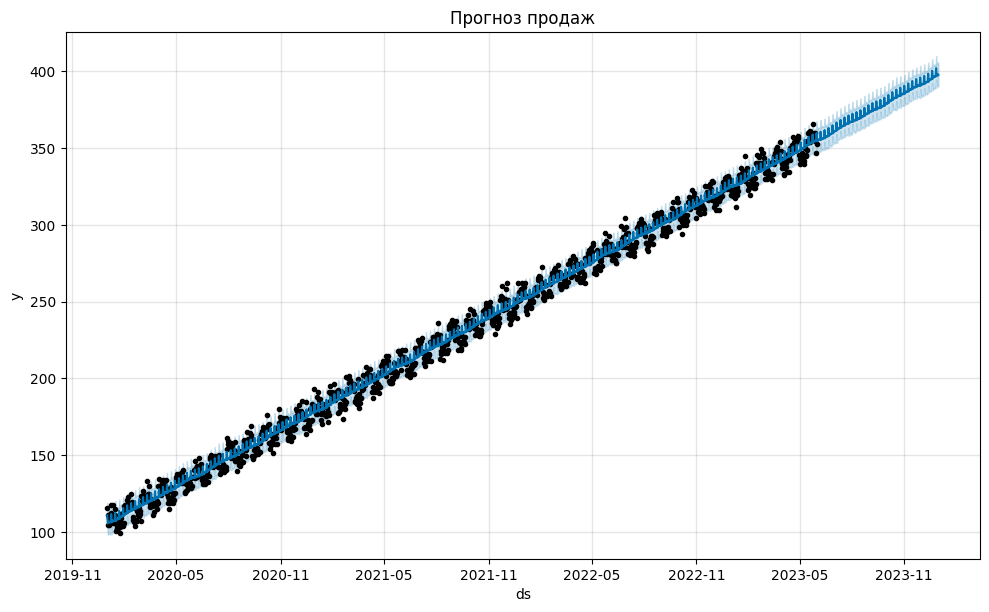

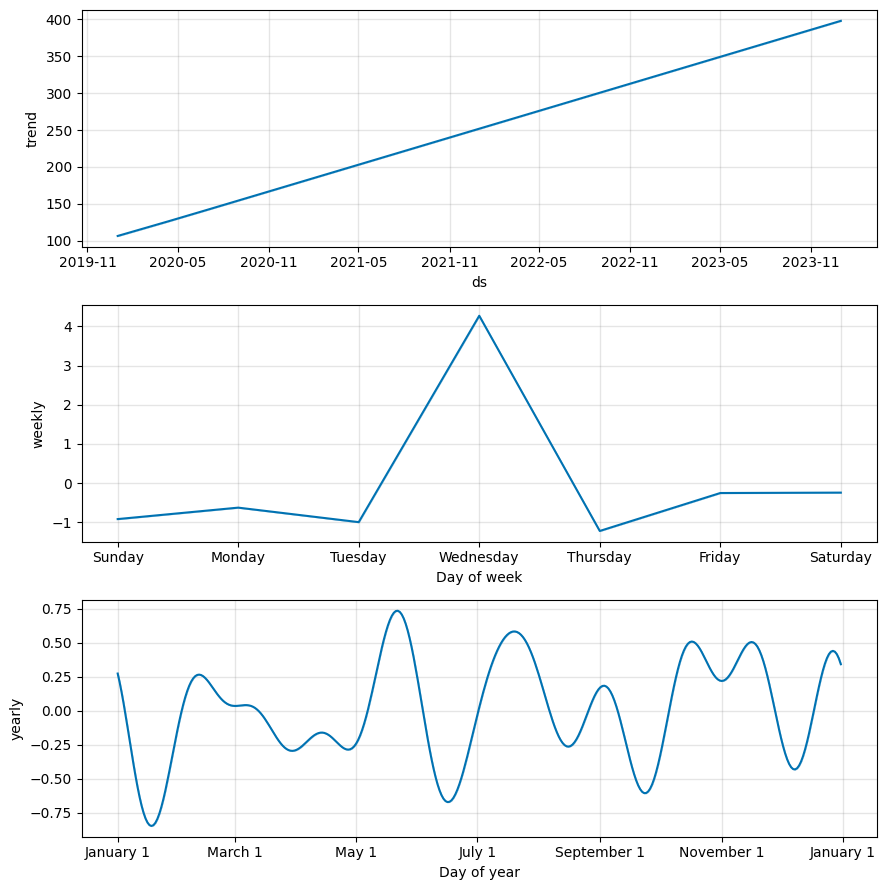

In [15]:
fig1 = model.plot(forecast)
plt.title("Прогноз продаж")
plt.show()

# График компонентов (тренд, сезонность)
fig2 = model.plot_components(forecast)
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Объединяем прогноз с реальными данными
test_forecast = forecast.merge(test, on='ds', how='inner')
mae = mean_absolute_error(test['y'], test_forecast['yhat'])
mape = mean_absolute_percentage_error(test['y'], test_forecast['yhat'])

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape*100:.2f}%")

MAE: 4.90
MAPE: 1.30%
